In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_train_cleaned = pd.read_csv('./datasets/train_cleaned.csv')
df_test_cleaned = pd.read_csv('./datasets/test_cleaned.csv')

In [4]:
df_train_cleaned.head()

,Id,lot_area,street,land_cont,neighborhood,cond_1,cond_2,bldg_type,style,overall_qual,overall_cond,yr_built,yr_remodeled,roof_style,roof_mater,exter_1,exter_qual,exter_cond,foundation,bsmt_cond,bsmt_fin_1,bsmt_fin_1_sf,bsmt_fin_2,bsmt_fin_2_sf,bsmt_sf,heat,cent_air,gr_liv_area,full_bath,half_bath,bedrooms_gr,kitchen,kitch_qual,tot_rooms_gr,fireplaces,garage_type,garage_car_size,garage_cond,paved_drive,misc_val,year_sold,sale_price,has_pool
0,109,13517,Pave,Lvl,Sawyer,RRA,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Gd,TA,CBlock,TA,GLQ,533.0,Unf,0.0,725.0,GasA,Y,1479,2,1,3,1,Gd,6,0,Attchd,2,TA,Y,0,2010,130500,0
1,544,11492,Pave,Lvl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,Gd,TA,PConc,TA,GLQ,637.0,Unf,0.0,913.0,GasA,Y,2122,2,1,4,1,Gd,8,1,Attchd,2,TA,Y,0,2009,220000,0
2,153,7922,Pave,Lvl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,TA,Gd,CBlock,TA,GLQ,731.0,Unf,0.0,1057.0,GasA,Y,1057,1,0,3,1,Gd,5,0,Detchd,1,TA,Y,0,2010,109000,0
3,318,9802,Pave,Lvl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,TA,TA,PConc,TA,Unf,0.0,Unf,0.0,384.0,GasA,Y,1444,2,1,3,1,TA,7,0,BuiltIn,2,TA,Y,0,2010,174000,0
4,255,14235,Pave,Lvl,SawyerW,Norm,Norm,1Fam,Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,TA,TA,PConc,Gd,Unf,0.0,Unf,0.0,676.0,GasA,Y,1445,2,0,3,1,TA,6,0,Detchd,2,TA,N,0,2010,138500,0


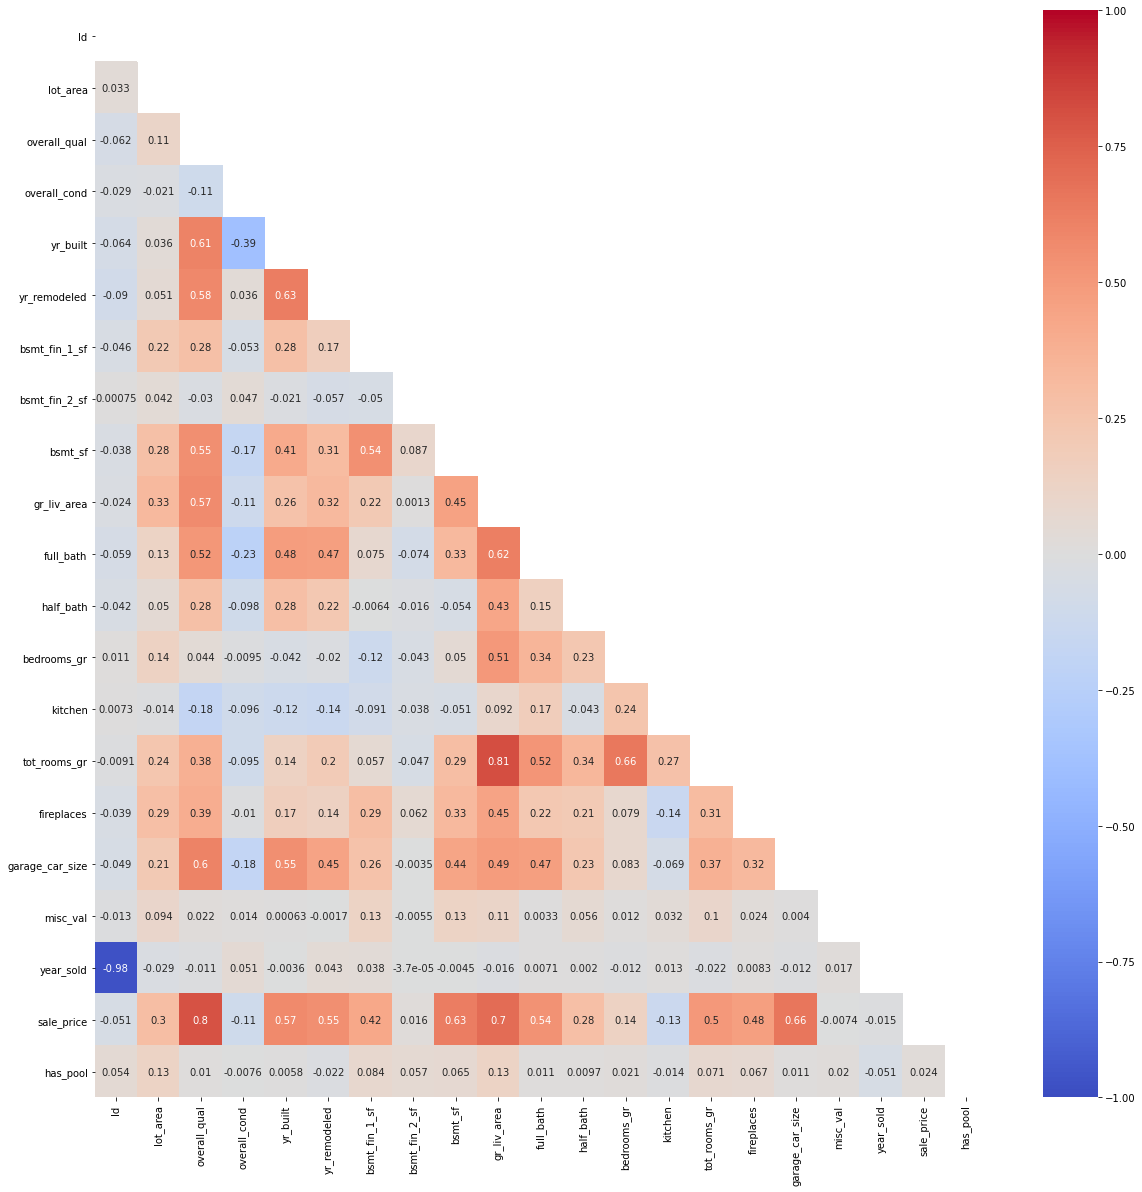

In [5]:
corr = df_train_cleaned.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20, 20))
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, cmap='coolwarm');

In [6]:
# df_train_cleaned.hist(figsize=(20, 20));

In [7]:
df_train_cleaned.describe()

,Id,lot_area,overall_qual,overall_cond,yr_built,yr_remodeled,bsmt_fin_1_sf,bsmt_fin_2_sf,bsmt_sf,gr_liv_area,full_bath,half_bath,bedrooms_gr,kitchen,tot_rooms_gr,fireplaces,garage_car_size,misc_val,year_sold,sale_price,has_pool
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,10065.208191,6.120429,5.568991,1971.708922,1984.190151,442.084837,47.935641,1057.471965,1499.330083,1.577279,0.371039,2.843491,1.043393,6.435885,0.587031,1.769381,51.574354,2007.775719,181469.701609,0.004388
std,843.980841,6742.488909,1.403698,1.083578,30.177889,21.036250,461.195041,164.964052,449.908003,500.447829,0.549279,0.501043,0.826618,0.203791,1.560225,0.625949,0.747000,573.393985,1.312014,79258.659352,0.066113
min,1.000000,1300.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2006.000000,12789.000000,0.000000
25%,753.500000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,793.000000,1129.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,0.000000,2007.000000,129825.000000,0.000000
50%,1486.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,368.000000,0.000000,994.000000,1444.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,0.000000,2008.000000,162500.000000,0.000000
75%,2198.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,733.500000,0.000000,1318.500000,1728.500000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,0.000000,2009.000000,214000.000000,0.000000
max,2930.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,6110.000000,5642.000000,4.000000,2.000000,8.000000,2.000000,15.000000,2.000000,3.000000,17000.000000,2010.000000,611657.000000,1.000000


In [8]:
# Feature engineering
# https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/
# https://stackoverflow.com/questions/45554008/error-in-python-script-expected-2d-array-got-1d-array-instead

def feat_eng(df):
    # Features for linear shift to get rid of 0s
    df['full_bath_shift'] = df['full_bath'] + 1
    df['half_bath_shift'] = df['half_bath'] + 1
    df['bedrooms_gr_shift'] = df['bedrooms_gr'] + 1
    df['fireplaces_shift'] = df['fireplaces'] + 1
    df['garage_car_size_shift'] = df['garage_car_size'] + 1
        
    # Features to MinMaxScale (1, 2)
    scaler = MinMaxScaler(feature_range=(1, 2))
    df['lot_area_scaled_mm'] = scaler.fit_transform(df[['lot_area']])
    df['bsmt_fin_1_sf_scaled_mm'] = scaler.fit_transform(df[['bsmt_fin_1_sf']])
    df['bsmt_fin_2_sf_scaled_mm'] = scaler.fit_transform(df[['bsmt_fin_2_sf']])
    df['bsmt_sf_scaled_mm'] = scaler.fit_transform(df[['bsmt_sf']])
    df['gr_liv_area_scaled_mm'] = scaler.fit_transform(df[['gr_liv_area']])
    
    # Feature engineering / multiplying columns
    df['tot_rooms_gr_gr_liv_area'] = df['tot_rooms_gr'] * df['gr_liv_area']
    df['tot_rooms_gr_bedroom_gr'] = df['tot_rooms_gr'] * (df['bedrooms_gr_shift'])
    df['full_bath_gr_liv_area'] = (df['full_bath_shift']) * df['gr_liv_area']
    df['gar_car_size_overall_qual'] = df['garage_car_size_shift'] * df['overall_qual']
    df['gar_car_size_overall_qual'] = df['garage_car_size_shift'] * df['overall_qual']
    df['yr_built_overall_qual'] = df['yr_built'] * df['overall_qual']
    
    # Features to convert to logs
    df['full_bath_gr_liv_area_log'] = df['full_bath_gr_liv_area'].map(np.log)
    df['tot_rooms_gr_bedroom_gr_log'] = df['tot_rooms_gr_bedroom_gr'].map(np.log)
    df['lot_area_scaled_mm_log'] = df['lot_area_scaled_mm'].map(np.log)
    df['gr_liv_area_scaled_mm_log'] = df['gr_liv_area_scaled_mm'].map(np.log)
    df['bsmt_fin_1_sf_scaled_mm_log'] = df['bsmt_fin_1_sf_scaled_mm'].map(np.log)
    df['bsmt_fin_2_sf_scaled_mm_log'] = df['bsmt_fin_2_sf_scaled_mm'].map(np.log)
    df['bsmt_sf_scaled_mm_log'] = df['bsmt_sf_scaled_mm'].map(np.log)
    df['bedrooms_gr_shift_log'] = df['bedrooms_gr_shift'].map(np.log)
    df['tot_rooms_gr_log'] = df['tot_rooms_gr'].map(np.log)
    df['tot_rooms_gr_gr_liv_area_log'] = df['tot_rooms_gr_gr_liv_area'].map(np.log)
    
    return df

In [9]:
# df_train_cleaned['bedrooms_gr'].sort_values()

In [10]:
df_train_cleaned_eng = feat_eng(df_train_cleaned)
df_train_cleaned_eng.head()

,Id,lot_area,street,land_cont,neighborhood,cond_1,cond_2,bldg_type,style,overall_qual,overall_cond,yr_built,yr_remodeled,roof_style,roof_mater,exter_1,exter_qual,exter_cond,foundation,bsmt_cond,bsmt_fin_1,bsmt_fin_1_sf,bsmt_fin_2,bsmt_fin_2_sf,bsmt_sf,heat,cent_air,gr_liv_area,full_bath,half_bath,bedrooms_gr,kitchen,kitch_qual,tot_rooms_gr,fireplaces,garage_type,garage_car_size,garage_cond,paved_drive,misc_val,year_sold,sale_price,has_pool,full_bath_shift,half_bath_shift,bedrooms_gr_shift,fireplaces_shift,garage_car_size_shift,lot_area_scaled_mm,bsmt_fin_1_sf_scaled_mm,bsmt_fin_2_sf_scaled_mm,bsmt_sf_scaled_mm,gr_liv_area_scaled_mm,tot_rooms_gr_gr_liv_area,tot_rooms_gr_bedroom_gr,full_bath_gr_liv_area,gar_car_size_overall_qual,yr_built_overall_qual,full_bath_gr_liv_area_log,tot_rooms_gr_bedroom_gr_log,lot_area_scaled_mm_log,gr_liv_area_scaled_mm_log,bsmt_fin_1_sf_scaled_mm_log,bsmt_fin_2_sf_scaled_mm_log,bsmt_sf_scaled_mm_log,bedrooms_gr_shift_log,tot_rooms_gr_log,tot_rooms_gr_gr_liv_area_log
0,109,13517,Pave,Lvl,Sawyer,RRA,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Gd,TA,CBlock,TA,GLQ,533.0,Unf,0.0,725.0,GasA,Y,1479,2,1,3,1,Gd,6,0,Attchd,2,TA,Y,0,2010,130500,0,3,2,4,1,3,1.077470,1.094437,1.0,1.118658,1.215712,8874,24,4437,18,11856,8.397734,3.178054,0.074616,0.195330,0.090240,0.0,0.112130,1.386294,1.791759,9.090881
1,544,11492,Pave,Lvl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,Gd,TA,PConc,TA,GLQ,637.0,Unf,0.0,913.0,GasA,Y,2122,2,1,4,1,Gd,8,1,Attchd,2,TA,Y,0,2009,220000,0,3,2,5,2,3,1.064629,1.112863,1.0,1.149427,1.336850,16976,40,6366,21,13972,8.758727,3.688879,0.062626,0.290316,0.106936,0.0,0.139264,1.609438,2.079442,9.739556
2,153,7922,Pave,Lvl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,TA,Gd,CBlock,TA,GLQ,731.0,Unf,0.0,1057.0,GasA,Y,1057,1,0,3,1,Gd,5,0,Detchd,1,TA,Y,0,2010,109000,0,2,1,4,1,2,1.041991,1.129518,1.0,1.172995,1.136209,5285,20,2114,10,9765,7.656337,2.995732,0.041133,0.127698,0.121791,0.0,0.159560,1.386294,1.609438,8.572628
3,318,9802,Pave,Lvl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,TA,TA,PConc,TA,Unf,0.0,Unf,0.0,384.0,GasA,Y,1444,2,1,3,1,TA,7,0,BuiltIn,2,TA,Y,0,2010,174000,0,3,2,4,1,3,1.053912,1.000000,1.0,1.062848,1.209118,10108,28,4332,15,10030,8.373785,3.332205,0.052509,0.189891,0.000000,0.0,0.060952,1.386294,1.945910,9.221082
4,255,14235,Pave,Lvl,SawyerW,Norm,Norm,1Fam,Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,TA,TA,PConc,Gd,Unf,0.0,Unf,0.0,676.0,GasA,Y,1445,2,0,3,1,TA,6,0,Detchd,2,TA,N,0,2010,138500,0,3,1,4,1,3,1.082023,1.000000,1.0,1.110638,1.209307,8670,24,4335,18,11400,8.374477,3.178054,0.078832,0.190047,0.000000,0.0,0.104935,1.386294,1.791759,9.067624


In [11]:
df_test_cleaned_eng = feat_eng(df_test_cleaned)
df_test_cleaned_eng.head()

,Id,lot_area,street,land_cont,neighborhood,cond_1,cond_2,bldg_type,style,overall_qual,overall_cond,yr_built,yr_remodeled,roof_style,roof_mater,exter_1,exter_qual,exter_cond,foundation,bsmt_cond,bsmt_fin_1,bsmt_fin_1_sf,bsmt_fin_2,bsmt_fin_2_sf,bsmt_sf,heat,cent_air,gr_liv_area,full_bath,half_bath,bedrooms_gr,kitchen,kitch_qual,tot_rooms_gr,fireplaces,garage_type,garage_car_size,garage_cond,paved_drive,misc_val,year_sold,has_pool,full_bath_shift,half_bath_shift,bedrooms_gr_shift,fireplaces_shift,garage_car_size_shift,lot_area_scaled_mm,bsmt_fin_1_sf_scaled_mm,bsmt_fin_2_sf_scaled_mm,bsmt_sf_scaled_mm,gr_liv_area_scaled_mm,tot_rooms_gr_gr_liv_area,tot_rooms_gr_bedroom_gr,full_bath_gr_liv_area,gar_car_size_overall_qual,yr_built_overall_qual,full_bath_gr_liv_area_log,tot_rooms_gr_bedroom_gr_log,lot_area_scaled_mm_log,gr_liv_area_scaled_mm_log,bsmt_fin_1_sf_scaled_mm_log,bsmt_fin_2_sf_scaled_mm_log,bsmt_sf_scaled_mm_log,bedrooms_gr_shift_log,tot_rooms_gr_log,tot_rooms_gr_gr_liv_area_log
0,2658,9142,Pave,Lvl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,TA,Fa,Other,TA,Unf,0,Unf,0,1020,GasA,N,1928,2,0,4,2,Fa,9,0,Detchd,1,Fa,Y,0,2006,0,3,1,5,1,2,1.035857,1.000000,1.0,1.387833,1.373802,17352,45,5784,12,11460,8.662851,3.806662,0.035229,0.317582,0.000000,0.0,0.327743,1.609438,2.197225,9.761463
1,2718,9662,Pave,Lvl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,TA,TA,CBlock,TA,Unf,0,Unf,0,1967,GasA,Y,1967,2,0,6,2,TA,10,0,Attchd,2,TA,Y,0,2006,0,3,1,7,1,3,1.038289,1.000000,1.0,1.747909,1.383387,19670,70,5901,15,9885,8.682877,4.248495,0.037574,0.324535,0.000000,0.0,0.558420,1.945910,2.302585,9.886850
2,2414,17104,Pave,Lvl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,Gd,TA,PConc,Gd,GLQ,554,Unf,0,654,GasA,Y,1496,2,1,3,1,Gd,7,1,Attchd,2,TA,Y,0,2006,0,3,2,4,2,3,1.073103,1.242133,1.0,1.248669,1.267633,10472,28,4488,21,14042,8.409162,3.332205,0.070554,0.237152,0.216830,0.0,0.222078,1.386294,1.945910,9.256460
3,1989,8520,Pave,Lvl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Gd,TA,CBlock,TA,Unf,0,Unf,0,968,GasA,Y,968,1,0,2,1,TA,5,0,Detchd,2,TA,N,0,2007,0,2,1,3,1,3,1.032947,1.000000,1.0,1.368061,1.137872,4840,15,1936,15,9615,7.568379,2.708050,0.032416,0.129160,0.000000,0.0,0.313394,1.098612,1.609438,8.484670
4,625,9500,Pave,Lvl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,TA,TA,CBlock,TA,BLQ,609,Unf,0,1394,GasA,Y,1394,1,1,3,1,TA,6,2,Attchd,2,TA,Y,0,2009,0,2,2,4,3,3,1.037531,1.266171,1.0,1.530038,1.242566,8364,24,2788,18,11778,7.933080,3.178054,0.036844,0.217178,0.235998,0.0,0.425293,1.386294,1.791759,9.031692


In [12]:
# df_train_cleaned.hist(figsize=(20, 20));

In [13]:
df_test_cleaned.to_csv('./datasets/test_cleaned_eng.csv', index=False)
df_train_cleaned.to_csv('./datasets/train_cleaned_eng.csv', index=False)